**Importing necessary tools and reading data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("heart.csv")
pd.set_option("display.max_columns",None)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Description**

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

**EDA**

In [3]:
data.shape

(918, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.isnull().sum() #NO NULL Values !!

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [7]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [8]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Quite Balanced Dataset

**Vizualization**

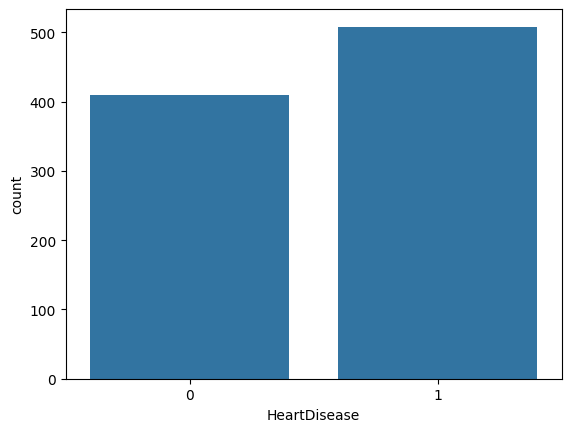

In [9]:
sns.countplot(x=data['HeartDisease'],data=data)
plt.show()

Let's analyze Age column 

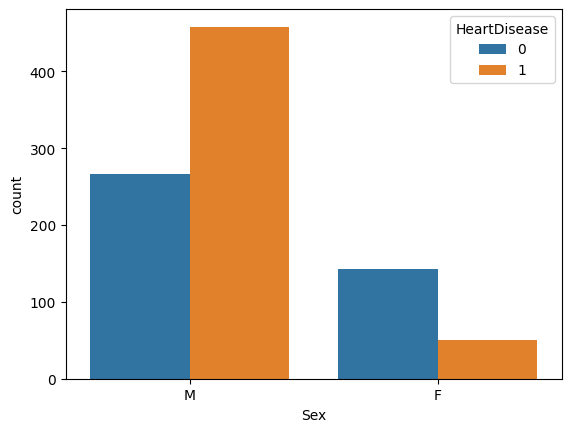

In [10]:
sns.countplot(x=data['Sex'],data=data,hue=data['HeartDisease'])
plt.show()

It is obserable that Male faces heart failure more than Female

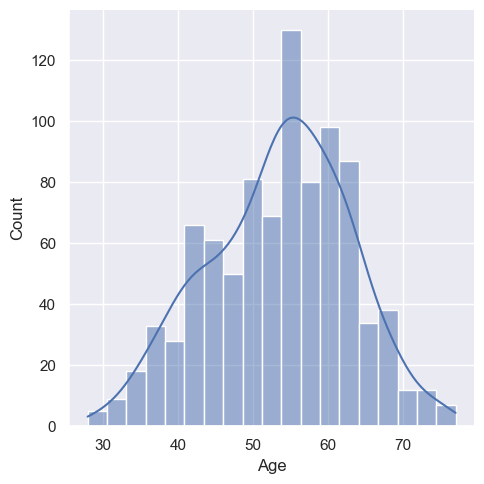

In [11]:
sns.set()
sns.displot(data['Age'],kde=True)
plt.show()

In [12]:
data['Age'].skew() 

-0.19593302867569365

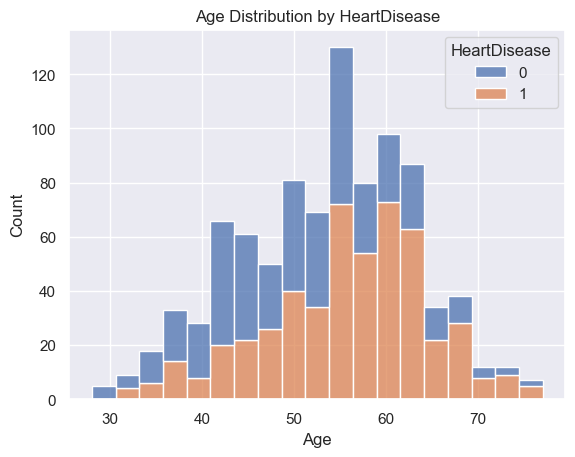

In [13]:
sns.histplot(data=data, x='Age', hue='HeartDisease', multiple='stack')
plt.title('Age Distribution by HeartDisease')
plt.show()

It is observable that more than 55 years older person faces Heart Failure more than other

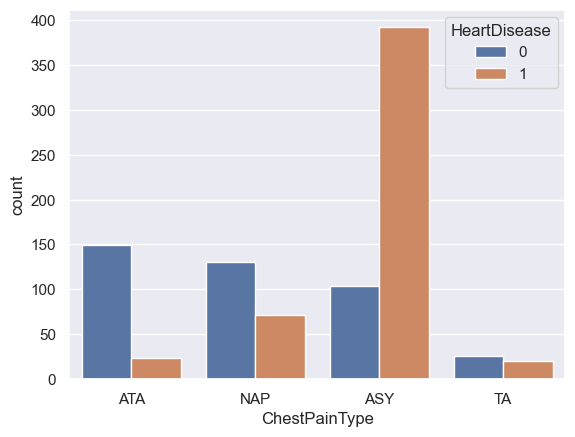

In [14]:
sns.countplot(x=data['ChestPainType'],data=data,hue=data['HeartDisease'])
plt.show()

Heart Failure person most of the case have "ASY" type Chestpain 

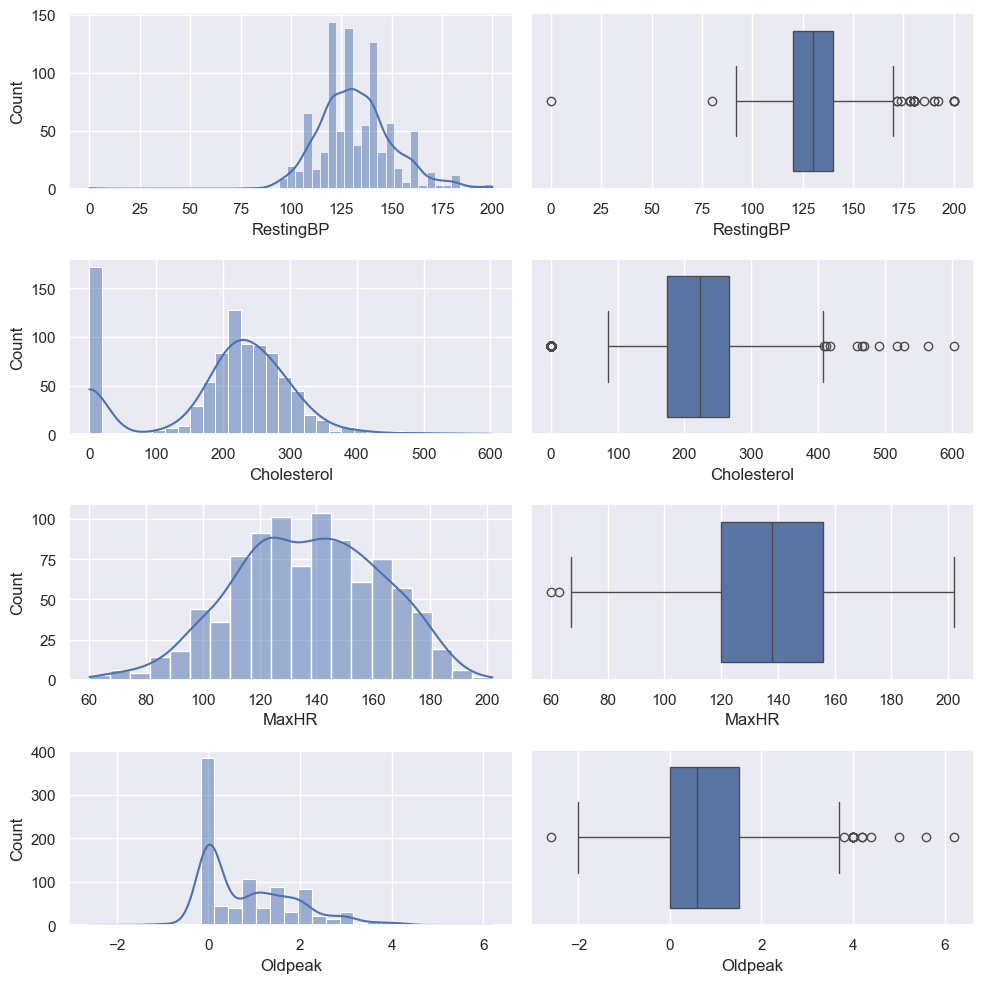

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(10,10))

sns.histplot(data['RestingBP'],kde=True,ax=axes[0,0])
sns.boxplot(x=data['RestingBP'],data=data,ax=axes[0,1])
sns.histplot(data['Cholesterol'],kde=True,ax=axes[1,0])
sns.boxplot(x=data['Cholesterol'],data=data,ax=axes[1,1])
sns.histplot(data['MaxHR'],kde=True,ax=axes[2,0])
sns.boxplot(x=data['MaxHR'],data=data,ax=axes[2,1])
sns.histplot(data['Oldpeak'],kde=True,ax=axes[3,0])
sns.boxplot(x=data['Oldpeak'],data=data,ax=axes[3,1])

plt.tight_layout()
plt.show()

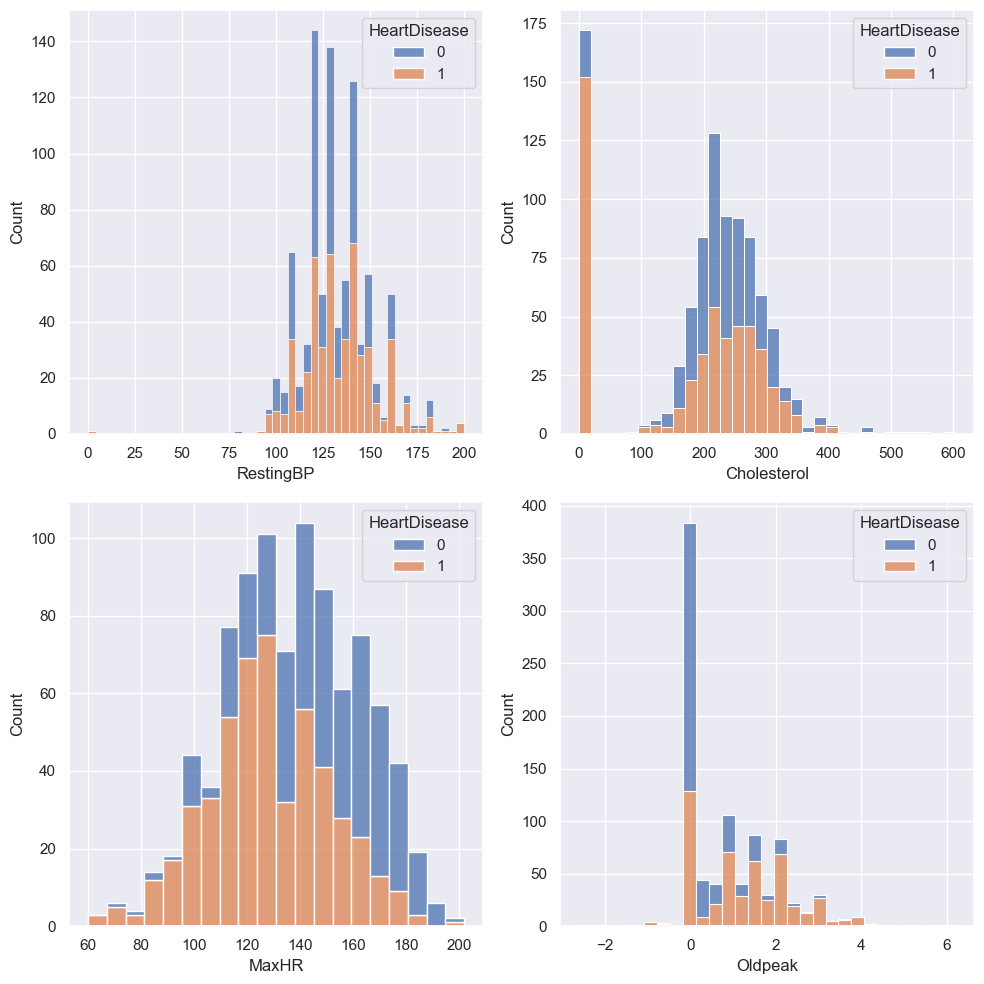

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

sns.histplot(data=data, x='RestingBP', hue='HeartDisease', multiple='stack',ax=axes[0,0])
sns.histplot(data=data, x='Cholesterol', hue='HeartDisease', multiple='stack',ax=axes[0,1])
sns.histplot(data=data, x='MaxHR', hue='HeartDisease', multiple='stack',ax=axes[1,0])
sns.histplot(data=data, x='Oldpeak', hue='HeartDisease', multiple='stack',ax=axes[1,1])

plt.tight_layout()
plt.show()

Observation :

Resting BP varies for heart failure person

Cholesterol is seen higher for heart Failure patient

Oldpeak is high for Heart Failure patient more than other case

MaxHR is very low for Heart Failure patient

In [17]:
print(data['RestingBP'].skew(),'\n')
print(data['Cholesterol'].skew(),'\n')
print(data['MaxHR'].skew(),'\n')
print(data['Oldpeak'].skew())


0.1798393100516288 

-0.6100864307268192 

-0.14435941846180994 

1.0228720218107528


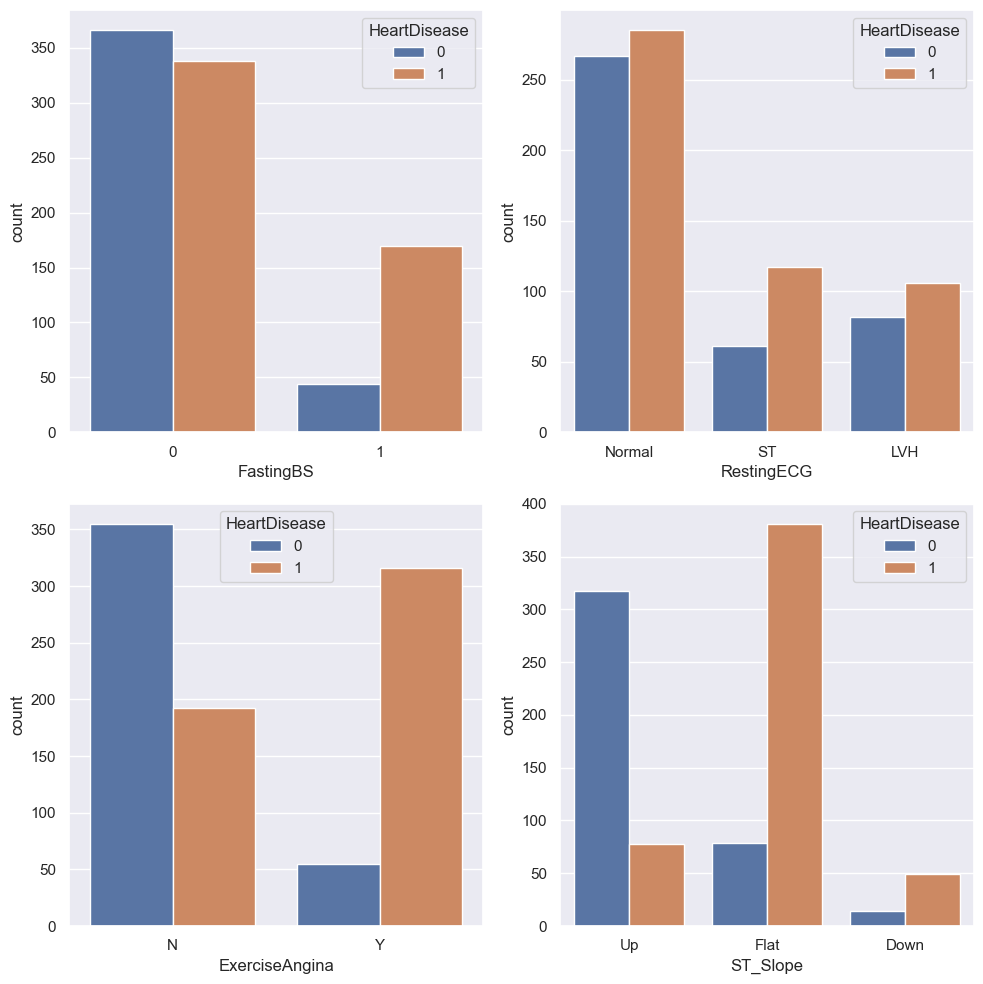

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

sns.countplot(x=data['FastingBS'],hue=data['HeartDisease'],data=data,ax=axes[0,0])
sns.countplot(x=data['RestingECG'],hue=data['HeartDisease'],data=data,ax=axes[0,1])
sns.countplot(x=data['ExerciseAngina'],hue=data['HeartDisease'],data=data,ax=axes[1,0])
sns.countplot(x=data['ST_Slope'],hue=data['HeartDisease'],data=data,ax=axes[1,1])

plt.tight_layout()
plt.show()

Observation :

Fasting BS is higher for heart failure person on the other hand it can be said that lower for healthy person. 

RestingECG 3 case are higher for heart Failure patient

Excercise Angina is Yes for Heart Failure patient more than other case

ST_Slop is normally Flat for Heart Failure patient


**Data Preprocessing**

In [19]:
sex_map = {'M':0,"F":1}
exer_map = {'Y':1,'N':0}
chest_map = {'TA':0,'ATA':1,'NAP':2,'ASY':3}
ecg_map = {'Normal':0,'ST':1,'LVH':2}
slope_map = {'Up':0,'Flat':1,'Down':2}

data['Sex']=data['Sex'].map(sex_map)

data['ExerciseAngina']=data['ExerciseAngina'].map(exer_map)

data['ChestPainType']=data['ChestPainType'].map(chest_map)

data['RestingECG']=data['RestingECG'].map(ecg_map)

data['ST_Slope']=data['ST_Slope'].map(slope_map)

In [20]:
df = data.copy()

In [21]:
df1 = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]

In [22]:
df2 = df1[df1.Oldpeak<=(df1.Oldpeak.mean()+3*df1.Oldpeak.std())]

In [23]:
df3 = df2[df2.RestingBP<=(df2.RestingBP.mean()+3*df2.RestingBP.std())]

**Splitting**

In [24]:
X = data.drop('HeartDisease',axis=1)
Y = data['HeartDisease']
x = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [25]:
from sklearn.model_selection import train_test_split,cross_val_score

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scale = StandardScaler()

In [29]:
X = scale.fit_transform(X)
x = scale.fit_transform(x)

Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_reg = LogisticRegression()

In [32]:
log_reg1 = LogisticRegression()

In [33]:
log_reg.fit(X_train,Y_train)

C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
log_reg1.fit(x_train,y_train)

C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
print("Train score of without outlier removal : ", log_reg.score(X_train,Y_train) ,'\n')
print("Test score of without outlier removal : ", log_reg.score(X_test,Y_test) ,'\n')
print("Train score of with outlier removal : ", log_reg1.score(x_train,y_train) ,'\n')
print("Test score of with outlier removal : ", log_reg1.score(x_test,y_test) )

Train score of without outlier removal :  0.8583106267029973 

Test score of without outlier removal :  0.8315217391304348 

Train score of with outlier removal :  0.8583106267029973 

Test score of with outlier removal :  0.8315217391304348


SVM

In [36]:
from sklearn.svm import SVC

In [37]:
svc = SVC()

In [38]:
svc1=SVC()

In [39]:
svc.fit(X_train,Y_train)

SVC()

In [40]:
svc1.fit(x_train,y_train)

SVC()

In [41]:
print("Train score of without outlier removal : ", svc.score(X_train,Y_train) ,'\n')
print("Test score of without outlier removal : ", svc.score(X_test,Y_test) ,'\n')
print("Train score of with outlier removal : ", svc1.score(x_train,y_train) ,'\n')
print("Test score of with outlier removal : ", svc1.score(x_test,y_test) )

Train score of without outlier removal :  0.7343324250681199 

Test score of without outlier removal :  0.6847826086956522 

Train score of with outlier removal :  0.7343324250681199 

Test score of with outlier removal :  0.6847826086956522


     It looks like SVM is facing Overfitting issue

In [43]:
from sklearn.ensemble import BaggingClassifier

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid_param = {
    'kernel':['linear','poly','rbf'],
    'C':[0.01,0.1,1,1.5,10,50,100],
}
grid_search = GridSearchCV(svc,grid_param, cv=5)

In [49]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 1.5, 10, 50, 100],
                         'kernel': ['linear', 'poly', 'rbf']})

In [50]:
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [53]:
bag_model = BaggingClassifier(estimator=SVC(kernel='linear',C=1), n_estimators=100, max_samples=0.8, random_state=0)
scores = cross_val_score(bag_model, X_train, Y_train, cv=5)
print('Score without outlier removal is : ', scores.mean())

Score without outlier removal is :  0.8528655297735531


 Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt1=DecisionTreeClassifier()

In [56]:
dt2=DecisionTreeClassifier()

In [57]:
dt1.fit(X_train,Y_train)

DecisionTreeClassifier()

In [58]:
dt2.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
print("Train score of with outlier removal : ", dt1.score(X_train,Y_train) ,'\n')
print("Test score of with outlier removal : ", dt1.score(X_test,Y_test) ,'\n')
print("Train score of without outlier removal : ", dt2.score(x_train,y_train) ,'\n')
print("Test score of without outlier removal : ", dt2.score(x_test,y_test) )

Train score of without outlier removal :  1.0 

Test score of without outlier removal :  0.8043478260869565 

Train score of with outlier removal :  1.0 

Test score of with outlier removal :  0.7934782608695652


   Overfitting issue

In [91]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [92]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [93]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [94]:
bag_model_dt = BaggingClassifier(
    estimator=DecisionTreeClassifier(criterion='gini',max_depth=30,min_samples_split=5,min_samples_leaf=4,max_features='log2'), 
    n_estimators=100, 
    max_samples=0.9, 
    oob_score=True,
    random_state=0
)

scores = cross_val_score(bag_model_dt, X, y, cv=5)
scores.mean()

0.8289082917557614

Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rt1=RandomForestClassifier(n_estimators=100)

In [74]:
rt2=RandomForestClassifier(n_estimators=100)

In [75]:
rt1.fit(X_train,Y_train)

RandomForestClassifier()

In [76]:
rt2.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
print("Train score of with outlier removal : ", rt1.score(X_train,Y_train) ,'\n')
print("Test score of with outlier removal : ", rt1.score(X_test,Y_test) ,'\n')
print("Train score of without outlier removal : ", rt2.score(x_train,y_train) ,'\n')
print("Test score of without outlier removal : ", rt2.score(x_test,y_test) )

Train score of with outlier removal :  1.0 

Test score of with outlier removal :  0.8641304347826086 

Train score of without outlier removal :  1.0 

Test score of without outlier removal :  0.8804347826086957


Overfitting Issue

In [78]:
param_grid = {
    'n_estimators': [100, 200, 300,500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

In [79]:
grid_search.fit(X_train,Y_train)

C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]})

In [81]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [100]:
rt1=RandomForestClassifier(n_estimators=400,max_depth=None,min_samples_split=2,min_samples_leaf=2,max_features='sqrt',bootstrap=True)

In [101]:
rt2=RandomForestClassifier(n_estimators=400,max_depth=None,min_samples_split=2,min_samples_leaf=2,max_features='sqrt',bootstrap=True)

In [102]:
rt1.fit(X_train,Y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=400)

In [103]:
rt2.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=400)

In [104]:
print("Train score of without outlier removal : ", rt1.score(X_train,Y_train) ,'\n')
print("Test score of without outlier removal : ", rt1.score(X_test,Y_test) ,'\n')
print("Train score of with outlier removal : ", rt2.score(x_train,y_train) ,'\n')
print("Test score of with outlier removal : ", rt2.score(x_test,y_test) )

Train score of without outlier removal :  0.9659400544959128 

Test score of without outlier removal :  0.8858695652173914 

Train score of with outlier removal :  0.9645776566757494 

Test score of with outlier removal :  0.8913043478260869


In [106]:
scores = cross_val_score(rt2, X_train, Y_train, cv=5)
scores.mean()

0.8664616531544125

Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [120]:
nb1=GaussianNB()

In [121]:
nb1_1 = GaussianNB()

In [124]:
nb1.fit(X_train,Y_train)

GaussianNB()

In [125]:
nb1_1.fit(x_train,y_train)

GaussianNB()

In [128]:
print("Train score of without outlier removal(GaussianNB) : ", nb1.score(X_train,Y_train) ,'\n')
print("Test score of without outlier removal(GaussianNB) : ", nb1.score(X_test,Y_test) ,'\n')
print("Train score of with outlier removal(GaussianNB) : ", nb1_1.score(x_train,y_train) ,'\n')
print("Test score of with outlier removal(GaussianNB) : ", nb1_1.score(x_test,y_test))

Train score of without outlier removal(GaussianNB) :  0.8637602179836512 

Test score of without outlier removal(GaussianNB) :  0.8369565217391305 

Train score of with outlier removal(GaussianNB) :  0.8637602179836512 

Test score of with outlier removal(GaussianNB) :  0.8369565217391305


KNN

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
max=0
a=0
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    if max<knn.score(X_test,Y_test):
        max=knn.score(X_test,Y_test)
        a=i
print('n_neighbors:',i,'\n')
print(max)

n_neighbors: 9 

0.7065217391304348


In [138]:
knn=KNeighborsClassifier(n_neighbors=9)

In [139]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [140]:
knn.score(X_test,Y_test)

0.6684782608695652

XGBoost

In [141]:
from xgboost import XGBClassifier 

In [142]:
xgb =XGBClassifier()

In [143]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [144]:
xgb.score(X_test,Y_test)

0.8641304347826086

In [145]:
xgb.score(X_train,Y_train)

1.0

**Final Report**

In [110]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [111]:
y_pred= rt2.predict(x_test)

In [112]:
CF = confusion_matrix(y_pred,y_test)

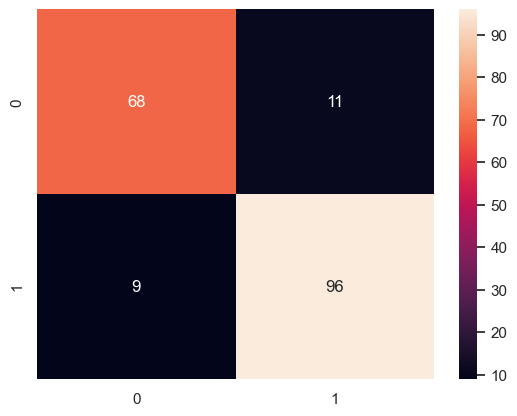

In [113]:
sns.heatmap(CF,annot=True)
plt.show()

In [114]:
classification_report(y_pred,y_test,output_dict=True)

{'0': {'precision': 0.8831168831168831,
  'recall': 0.8607594936708861,
  'f1-score': 0.8717948717948718,
  'support': 79.0},
 '1': {'precision': 0.897196261682243,
  'recall': 0.9142857142857143,
  'f1-score': 0.9056603773584906,
  'support': 105.0},
 'accuracy': 0.8913043478260869,
 'macro avg': {'precision': 0.890156572399563,
  'recall': 0.8875226039783002,
  'f1-score': 0.8887276245766812,
  'support': 184.0},
 'weighted avg': {'precision': 0.8911513111025505,
  'recall': 0.8913043478260869,
  'f1-score': 0.8911202961654152,
  'support': 184.0}}

In [115]:
roc_auc_score(y_pred,y_test)

0.8875226039783002